['git', 'ofa', 'blip', 'clipcap', 'microsoft_api']
bootstraptime 1010 sampletime 505
bootstraptime 211 sampletime 106
bootstraptime 215 sampletime 108
bootstraptime 189 sampletime 95
bootstraptime 197 sampletime 99
bootstraptime 218 sampletime 109
['git', 'ofa', 'blip', 'clipcap', 'microsoft_api']
bootstraptime 987 sampletime 494


/tmp/ipykernel_1739228/1298380149.py:352: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


bootstraptime 215 sampletime 108
bootstraptime 210 sampletime 105
bootstraptime 186 sampletime 93
bootstraptime 190 sampletime 95
bootstraptime 212 sampletime 106
['*', '*', ' ', '*', '*', '*']


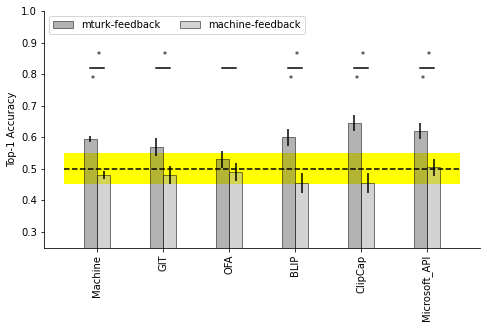

In [49]:
import json
import matplotlib.pyplot as plt
import numpy as np
from colour import Color
import seaborn as sn
import pandas as pd
from matplotlib.patches import Rectangle
 
import pingouin as pg
from scipy import stats
import random
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols

def outputIconForStats(pval):
    if pval <= 0.05:
        icon = '*'
    else:
        icon = ' '
    return icon

def ConvertDictToDataFrame(datadict):
    #data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}    
    X = []
    Y = []
    for key in datadict.keys():
        for ele in datadict[key]:
            X.append(ele)
            Y.append(key)
        
    data = {'X': X, 'group': Y}
    df = pd.DataFrame.from_dict(data)
    return df

def ComputeStats_group1(d_cond):
    #compare against chance
    r_data = np.random.choice([0, 1], size=len(d_cond), p=[.5, .5])
    result = pg.ttest(d_cond, r_data, correction=True) 
    pval = result.at['T-test',"p-val"]
    Tval = result.at['T-test',"T"]
    dof = math.floor(result.at['T-test',"dof"])
    icon = outputIconForStats(pval)
    return icon, pval, Tval, dof

def ComputeStats_group2(data_d1, data_d2):
    result = pg.ttest(data_d1, data_d2, correction=True) 

    # reporting format in Turing project (p < 10−15, two-tailed t-test, t = 8.5, df = 478)
    pval = result.at['T-test',"p-val"]
    Tval = result.at['T-test',"T"]
    dof = math.floor(result.at['T-test',"dof"])
    icon = outputIconForStats(pval)
    return icon, pval, Tval, dof
    
def ComputeStats_group3(data_dict):
    df = ConvertDictToDataFrame(data_dict)
    #print(df)
    mod = ols('X ~ group', data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    #A one-way ANOVA revealed that there [was or was not] a statistically significant difference in [dependent variable] 
    #between at least two groups (F(between groups df, within groups df) = [F-value], p = [p-value]).
    BetweenGP_df = aov_table.df.group
    WithinGP_df = aov_table.df.Residual
    Fval = aov_table.F.group
    pval = aov_table['PR(>F)'].group
    icon = outputIconForStats(pval)
    return icon, BetweenGP_df, WithinGP_df, Fval, pval

def displayStats_group12(pval, Tval, dof):    
    if pval < 0.05:
        print('There is difference between data1 and data2.')
        if pval > 0.01 and pval < 0.05:
            print("(p < 0.05, two-tailed t-test, t = " + str("{0:.2f}".format(Tval)) + ", df = " + str(dof) + ")")
        elif pval > 0.001 and pval <= 0.01:
            print("(p < 0.01, two-tailed t-test, t = " + str("{0:.2f}".format(Tval)) + ", df = " + str(dof) + ")")
        elif pval > 0.0001 and pval <= 0.001:
            print("(p < 0.001, two-tailed t-test, t = " + str("{0:.2f}".format(Tval)) + ", df = " + str(dof) + ")")
        else:
            print("(p < 0.0001, two-tailed t-test, t = " + str("{0:.2f}".format(Tval)) + ", df = " + str(dof) + ")")
    else:
        print('There is NO difference between data1 and data2.')
        print("(p > 0.05, two-tailed t-test, t = " + str("{0:.2f}".format(Tval)) + ", df = " + str(dof) + ")")

        
def displayStats_group3(BetweenGP_df, WithinGP_df, Fval, pval):    
    print("F(" + str(BetweenGP_df) + ", " + str(WithinGP_df) + ") = " + str(Fval) +", p-val=" + str(pval))

    
def boostrap(data1, data2):
    import random
    import math
    store = []
    sample_mean = []
    if len(data1) < len(data2):
        SampleTimes = math.ceil(len(data1)/2)
        BootstrapTimes = len(data1)
    else:
        SampleTimes = math.ceil(len(data2)/2)
        BootstrapTimes = len(data2)
        
    print("bootstraptime",BootstrapTimes,"sampletime",SampleTimes)
    for i in range(BootstrapTimes):
        y1 = random.sample(data1, SampleTimes)
        #print(y1)
        y2 = random.sample(data2, SampleTimes)
        #print(y2)
        y_comb = y1+y2
        #print(y_comb)
        sample_mean.append(np.mean(np.array(y_comb), axis=0))
    
    stdval = np.std(np.array(sample_mean), axis=0)
    return stdval

def ConcatData(data1, data2):
    import random
    import math
    
    #print(data1)
    #print(data2)
    if len(data1) < len(data2):        
        BootstrapTimes = len(data1)
    else:        
        BootstrapTimes = len(data2)
    
    #print(BootstrapTimes)
    y1 = random.sample(data1, BootstrapTimes)
    #print(y1)
    y2 = random.sample(data2, BootstrapTimes)
    #print(y2)
    y_comb = y1+y2
    y_comb = np.array(y_comb)        
    return y_comb


def ComputeBarStdConfMat(contents):
    modelist = ['git', 'ofa', 'blip', 'clipcap', 'microsoft_api']
    print(modelist)
    
    #initialize matrix of absolute counts   
    result = {'human':0, 'countH':0, 'machine':0, 'countM': 0, 'result_H':[], 'result_M':[]}
    for modelname in modelist:
        result[modelname] = 0
        result['count_'+modelname] = 0
        result['result_'+modelname]=[]
    #print(result)

    # Iterating over keys
    for trialid in contents:
        trialinfor = contents[trialid]['trialData']
        if trialinfor['machine_groundtruth'] == "catch":
            continue
        if trialinfor['groundtruth'] == 'human':
            result['countH'] = result['countH'] + 1
            if trialinfor['response_speaker'] == trialinfor['groundtruth']:
                result['human'] = result['human'] + 1
                result['result_H'].append(1)
            else:
                result['result_H'].append(0)
                
        else:
            result['countM'] = result['countM'] + 1
            if trialinfor['response_speaker'] == trialinfor['groundtruth']:
                result['machine'] = result['machine'] + 1
                result['result_M'].append(1)
            else:
                result['result_M'].append(0)
                
            modelname = trialinfor['machine_groundtruth']
            
            result['count_'+modelname] = result['count_'+modelname] + 1
            if trialinfor['response_speaker'] == trialinfor['groundtruth']:
                result[modelname] = result[modelname] + 1
                result['result_' + modelname].append(1)
            else:
                result['result_' + modelname].append(0)
                
    #print(result)

    #compute confusion matrix
    result_conf_mat = np.zeros((2+len(modelist),2),'float32')
    result_conf_mat[0][0] = result['human']/result['countH']
    result_conf_mat[0][1] = (result['countH'] - result['human'])/result['countH']  
    result_conf_mat[1][0] = (result['countM'] - result['machine'])/result['countM']
    result_conf_mat[1][1] = result['machine']/result['countM']

    for i, modelname in enumerate(modelist):
        result_conf_mat[i+2][0] = (result['count_'+modelname] - result[modelname])/result['count_'+modelname]
        result_conf_mat[i+2][1] = result[modelname]/result['count_'+modelname]

    result_conf_mat = np.around(result_conf_mat, decimals=2)
        
    stdmodelist = ['M', 'git', 'ofa', 'blip', 'clipcap', 'microsoft_api']
    modelist_stats = ['Machine', 'GIT', 'OFA', 'BLIP', 'ClipCap', 'Microsoft_API']
    top1 = []
    top1_std = []
    resultFlist = {}
    data1tot = result['result_H']
    for i in range(1+len(modelist)):
        #print(i)
        top1.append((result_conf_mat[0][0]+result_conf_mat[i+1][1])/2)
        # compute bootstrap accuracy
        # compute and save std for top1 accuracy
        top_std_AI = boostrap(result['result_H'], result['result_' + stdmodelist[i]])
        top1_std.append(top_std_AI)
        data2tot = result['result_' + stdmodelist[i]]
        #resultFlist[modelist_stats[i]] = np.concatenate((data1tot,data2tot))
        resultFlist[modelist_stats[i]] = ConcatData(data1tot,data2tot)
    #print(top1)
    
    return top1, top1_std, result_conf_mat, resultFlist


### plots for grouping demographic information
def plot_res_demographics(condition_chosen_list, TextFilePath, plotname,facebarcolor, condition_results):
    
    compiledAllConds = {}
    
    modelist = ['Machine', 'GIT', 'OFA', 'BLIP', 'ClipCap', 'Microsoft_API']
    Pdata = {} #data stored for computing statistics 
    #initialize PData
    for i in range(0,len(modelist)):
        Pdata[modelist[i]] = {}
    
    for condition_chosen in condition_chosen_list:
        
        top1, top1std, result_conf_mat, resultFlist = ComputeBarStdConfMat(condition_results[condition_chosen])
        
        for i in range(0,len(modelist)):
            Pdata[modelist[i]][condition_chosen] = resultFlist[modelist[i]]
        
#         #compute barplot and errorbar of barplot
#         top1 = []
#         top1std = []

#         #compute confusion matrix
#         result_conf_mat = 

        compiledAllConds[condition_chosen] = top1
        compiledAllConds[condition_chosen +'_std'] = top1std
    
    ### we have the compiled resutls now; lets calculate stats
    chancePval = []
    groupPval = []
    
    for i in range(0,len(modelist)):
        for condition_chosen in condition_chosen_list:        
            #compute against chance 50%
            d_cond = Pdata[modelist[i]][condition_chosen]
            icon, pval, Tval, dof = ComputeStats_group1(d_cond)
            chancePval.append(icon)
        if len(Pdata[modelist[i]].keys()) == 2:
            data_d1 = Pdata[modelist[i]][condition_chosen_list[0]]
            data_d2 = Pdata[modelist[i]][condition_chosen_list[1]]
            icon, pval, Tval, dof =  ComputeStats_group2(data_d1, data_d2)
            groupPval.append(icon)
        elif len(Pdata[modelist[i]].keys()) >= 3: 
            icon, BetweenGP_df, WithinGP_df, Fval, pval = ComputeStats_group3(Pdata[modelist[i]])
            groupPval.append(icon)
        else:
            print(Pdata[modelist[i]].keys())
            print("Oops!  This should NOT happen...")
        
    
    #data
    #x-axis
    years = list(range(1, len(modelist)))
    strtask = modelist
    #print(years)
    #print(strtask)

    # Figure Size
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(len(strtask))  # the label locations
    point_x = [] #for plotting stats * or n.s.
    
    width = 0.2  # the width of the bars
    if len(condition_chosen_list) == 2:
        multiplier = -0.5 #len(condition_chosen_list)
    else:
        multiplier = -1 #len(condition_chosen_list)
    #ngroups = len(condition_chosen_list)

    ax.add_patch(Rectangle((-0.5, 0.45), len(modelist), 0.1,facecolor='yellow'))
    #bar chart properties
    #ax.bar(strtask, top1, color ='black', width = 0.3)    

    for ind, condition_chosen in enumerate(condition_chosen_list):
    #for condition_chosen in condition_chosen_list:
    #for attribute, measurement in compiledAllConds.items():
        measurement = compiledAllConds[condition_chosen]
        measurement_std = compiledAllConds[condition_chosen + '_std']
        attribute = condition_chosen
        
        offset = width * multiplier

        rects = ax.bar(x + offset, measurement, yerr= measurement_std, width = width,alpha=0.5,
                       label=attribute, edgecolor='black', color=facebarcolor[ind], ecolor='black')#,
                       #align='center', alpha=0.5, ecolor='black', capsize=10,color ='black')
        #ax.bar_label(rects, padding=3)
        point_x.extend( (x+offset).tolist() )
        multiplier += 1
    
#     ax.bar(strtask, top1, yerr=top1std,
#        align='center', alpha=0.5, ecolor='black', capsize=10,
#        color ='black', width = 0.3)

    ########## ready for plotting stats
    #print(point_x)
    ###### getting statistics
    #chancePval, groupPval = getStats(condition_chosen_list, TextFilePath)
    point_x.sort(reverse=False)
    #print(point_x)
    for i, p in enumerate(point_x):        
        ax.text(p, .7, chancePval[i], fontsize=8, transform=ax.get_xaxis_transform())
    
    ax.set_xticks(x, strtask)
    ax.legend(loc='upper left', ncol=len(condition_chosen_list))

    ###### plot stats for each group of bars
    totalPx = len(point_x)
#     print(totalPx)
#     print(point_x)
    count = 0
    print(groupPval)
    for s1 in range(0,totalPx, len(condition_chosen_list)):
        center_x = 0
        for s2 in range(0,len(condition_chosen_list)):
            center_x = center_x + point_x[s1+s2]
        center_x = center_x/len(condition_chosen_list)
        starting_x = point_x[s1]
        ending_x = point_x[s1+len(condition_chosen_list)-1]
        plt.plot(   np.array([starting_x, ending_x]),
                           np.arange(2)*0+0.82, 'k', label='chance (50%)')
        ax.text(center_x, .8, groupPval[count], fontsize=8, transform=ax.get_xaxis_transform())
        count = count + 1
    
    ###### ending: plot stats for each group of bars
    
    plt.ylabel('Top-1 Accuracy')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

    plt.ylim(0.25, 1)
    #plt.xlim(0.5, len(years)+0.5)

    #draw chance 0.5 
    chancex =np.arange(len(years)+2)-0.5
    plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
    #plt.legend()

    fig.tight_layout()

    fig.set_figwidth(7)
    fig.set_figheight(5)

    #fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
    plt.savefig(plotname + '.png',  bbox_inches='tight')
    plt.show()
#     fig.savefig('../' + plotname + '.png', bbox_inches='tight')
#     fig.savefig('Human_judge_bars_Giorgia'+condition_chosen+'.pdf', bbox_inches='tight')
    
#     fig.savefig('Human_judge_bars_Giorgia'+condition_chosen+'.png', bbox_inches='tight')


# #======================With or without gender questions=======
# with open("./savedResults/compiled.json", 'r') as f:
#     CompiledResults = json.load(f)

# key = 'inlab' #choose from these choices: inlab, mturk
# folderpath = './plots/Task1_' + key + '_' #for saving the plots

# condition_chosen_list = ['inlab_gender','inlab_nogender']
# TextFilePath = './savedResults/Task1_' + key + '_' #not being used
# plotpathname = './plots/Task1_' + key + '_demor_WwoGenderQuesBarPlotOverall' #for saving the plots
# facebarcolor = ['dimgray','darkgrey','lightgrey']

# plot_res_demographics(condition_chosen_list, TextFilePath, plotpathname,facebarcolor, CompiledResults)

#====================== quality controls (mturk versus inlab) =======
calculation_type = 'drop_training' # exclude training samples when gather human results 
keep_catch_trials = False 

with open("./savedResults/compiled_feedback_{}.json".format(calculation_type), 'r') as f:
    CompiledResults = json.load(f)
CompiledResults['machine-feedback']

key = 'mturk-machine-feedback' #choose from these choices: inlab, mturk
folderpath = './plots/Task1_' + key + '_' #for saving the plots

condition_chosen_list = ['mturk-feedback','machine-feedback']
TextFilePath = './savedResults/Task1_' + key + '_' #not being used
plotpathname = './plots/Task1_' + key + '_demor_mturk_feedback_BarPlotOverall' #for saving the plots
facebarcolor = ['dimgray','darkgrey','lightgrey']

plot_res_demographics(condition_chosen_list, TextFilePath, plotpathname,facebarcolor, CompiledResults)


In [52]:
len(CompiledResults['mturk-feedback']),len(CompiledResults['machine-feedback'])

(2040, 2000)

['git', 'ofa', 'blip', 'clipcap', 'microsoft_api']
bootstraptime 1010 sampletime 505
bootstraptime 211 sampletime 106
bootstraptime 215 sampletime 108
bootstraptime 189 sampletime 95
bootstraptime 197 sampletime 99
bootstraptime 218 sampletime 109


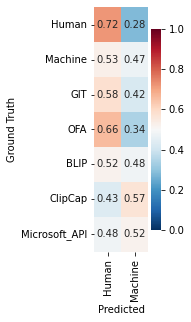

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


mean
[0.5950000286102295, 0.5699999928474426, 0.5300000309944153, 0.6000000238418579, 0.6449999809265137, 0.6200000047683716]
std
[0.010429371512475024, 0.0271856078426568, 0.02516015112172847, 0.028960301377565698, 0.027358189603085736, 0.026222764421132076]


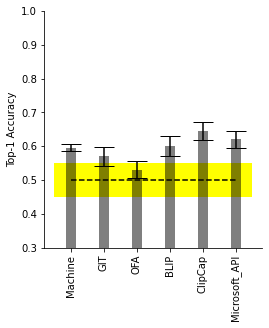

['git', 'ofa', 'blip', 'clipcap', 'microsoft_api']
bootstraptime 4100 sampletime 2050
bootstraptime 820 sampletime 410
bootstraptime 820 sampletime 410
bootstraptime 820 sampletime 410
bootstraptime 820 sampletime 410
bootstraptime 820 sampletime 410


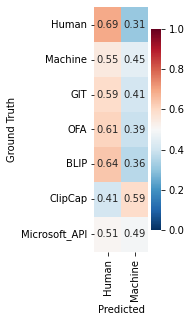

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


mean
[0.5699999928474426, 0.550000011920929, 0.5399999618530273, 0.5249999761581421, 0.6399999856948853, 0.5900000333786011]
std
[0.0053539377602307425, 0.014464194519057866, 0.013923620165657229, 0.01380126515408818, 0.013979933027180985, 0.013879063987777576]


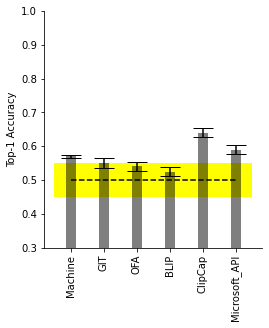

['git', 'ofa', 'blip', 'clipcap', 'microsoft_api']
bootstraptime 987 sampletime 494
bootstraptime 215 sampletime 108
bootstraptime 210 sampletime 105
bootstraptime 186 sampletime 93
bootstraptime 190 sampletime 95
bootstraptime 212 sampletime 106


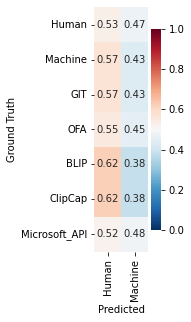

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


mean
[0.47999998927116394, 0.47999998927116394, 0.4899999797344208, 0.45499998331069946, 0.45499998331069946, 0.5049999952316284]
std
[0.011144390456639584, 0.027528999004948835, 0.02771346156830915, 0.028465967477390837, 0.02740456527471225, 0.028095241998137108]


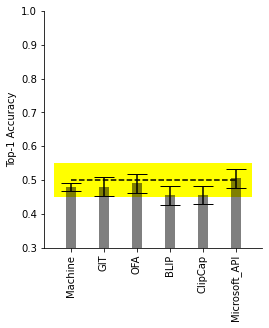

In [53]:
def plot_res_demographics_singleplot(condition_chosen, TextFilePath, condition_results, folderpath, saveflag):
    
    top1, top1std, result_conf_mat, dummy = ComputeBarStdConfMat(condition_results[condition_chosen])
    
    modelist = ['Human', 'Machine', 'GIT', 'OFA', 'BLIP', 'ClipCap', 'Microsoft_API']
    df_cm = pd.DataFrame(result_conf_mat, index = [i for i in modelist],
                  columns = [i for i in ['Human','Machine']])
    plt.figure(figsize = (1.2,4.5))
    
    if condition_chosen == 'machine':
        sn.heatmap(df_cm, annot=True,robust=True, cmap='RdBu_r', vmin=0, vmax=1, cbar=False)
    else:
        sn.heatmap(df_cm, annot=True,robust=True, cmap='RdBu_r', vmin=0, vmax=1)

    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    
    plotname = condition_chosen
    plt.savefig(folderpath + plotname + '_overall_confmat.eps', format='eps', bbox_inches='tight')
    plt.savefig(folderpath + plotname + '_overall_confmat.png', bbox_inches='tight')
    plt.show()
    
    if saveflag == 1:
        np.save(TextFilePath + "confmat.np", result_conf_mat)
        
    #data
    #x-axis
    years = list(range(1, len(modelist)-1))
    strtask = modelist[1:]
    #print(years)
    #print(strtask)

    # Figure Size
    fig, ax = plt.subplots()

    ax.add_patch(Rectangle((-0.5, 0.45), len(modelist)-1, 0.1,facecolor='yellow'))
    #bar chart properties
    #ax.bar(strtask, top1, color ='black', width = 0.3)
    ax.bar(strtask, top1, yerr=top1std,
       align='center', alpha=0.5, ecolor='black', capsize=10,
       color ='black', width = 0.3)

    print('mean')
    print(top1)
    print('std')
    print(top1std)
    
    plt.ylabel('Top-1 Accuracy')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

    plt.ylim(0.3, 1)
    #plt.xlim(0.5, len(years)+0.5)

    #draw chance 0.5 
    chancex =np.arange(len(years)+1)
    plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
    #plt.legend()

    fig.tight_layout()

    fig.set_figwidth(3.5)
    fig.set_figheight(5)

    #fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.savefig(folderpath + plotname + '_overall_barplot.eps', format='eps', bbox_inches='tight')
    plt.savefig(folderpath + plotname + '_overall_barplot.png', bbox_inches='tight')
    plt.show()



#======================Plot overall results (human judges)=======
calculation_type = 'drop_training' # exclude training samples when gather human results 
keep_catch_trials = False 
with open("./savedResults/compiled_feedback_{}.json".format(calculation_type), 'r') as f:
    CompiledResults = json.load(f)

#======================Plot overall results (human judges with feedback)=======   
key = 'mturk-feedback' #choose from these choices: inlab, mturk-feedback
TextFilePath = './savedResults/Task1_' + key + '_' #not being used
folderpath = './plots/Task1_' + key + '_' #for saving the plots
saveflag = 0 #save confmat for final plots
plot_res_demographics_singleplot(key, TextFilePath, CompiledResults, folderpath, saveflag)

#======================Plot overall results (human judges without feedback)======= 
key = 'mturk' #choose from these choices: inlab, mturk
TextFilePath = './savedResults/Task1_' + key + '_' #not being used
folderpath = './plots/Task1_' + key + '_' #for saving the plots
saveflag = 0 #save confmat for final plots
plot_res_demographics_singleplot(key, TextFilePath, CompiledResults, folderpath, saveflag)

#======================Plot overall results (AI judges)=======
with open("./savedResults/compiled_feedback_{}.json".format(calculation_type), 'r') as f:
    CompiledResults = json.load(f)

key = 'machine-feedback' #choose from these choices: inlab, mturk
TextFilePath = './savedResults/Task1_' + key + '_' #not being used
folderpath = './plots/Task1_' + key + '_' #for saving the plots
saveflag = 1
plot_res_demographics_singleplot(key, TextFilePath, CompiledResults, folderpath, saveflag)


In [26]:
CompiledResults

{'inlab': [],
 'inlab_gender': [],
 'inlab_nogender': [],
 'mturk': {'Trial_1': {'workerID': 'AZED64FULUY92',
   'workerData': {'country': 'Åland Islands',
    'age': '18-20',
    'engagement': '5',
    'difficulty': '5',
    'gender': 'female',
    'education': 'high school',
    'ai-experience': '1',
    'native': 'yes',
    'imagetype': 'COCO'},
   'trialData': {'response_gender': 'NA',
    'rt': 8743,
    'human_groundtruth': 'Participant_21',
    'hit': True,
    'trial': 1,
    'machine_groundtruth': '',
    'imageID': 'https://xiaoturing.s3.us-east-1.amazonaws.com/caption/imgset/0299.jpg',
    'caption': 'a person holding open a magazine and reading it',
    'response_speaker': 'human',
    'counterbalance': 14,
    'groundtruth': 'human',
    'phase': 'TEST'}},
  'Trial_2': {'workerID': 'AZED64FULUY92',
   'workerData': {'country': 'Åland Islands',
    'age': '18-20',
    'engagement': '5',
    'difficulty': '5',
    'gender': 'female',
    'education': 'high school',
    'ai-e